# CA hospitals

### Load python tools

In [1]:
import pandas as pd
import geopandas as gpd
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Hospital building characteristics

In [2]:
#https://data.chhs.ca.gov/dataset/hospital-building-data
#Metadata: https://data.chhs.ca.gov/dataset/hospital-building-data/resource/cefc10e5-5071-4ca4-8b03-2249caf0d294
buildings = pd.read_csv('input/ca-oshpd-gachospital-building-03052020.csv', encoding='Latin-1',\
                        dtype={'year_completed': object, 'building_code_year': object, 'stories': int,\
                               'height_ft': int}).fillna('')

In [3]:
buildings.columns = buildings.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [4]:
buildings.head()

county_code  perm_id     facility_name     city building_nbr  \
0  01 - Alameda    11210  Alameda Hospital  Alameda    BLD-01278   
1  01 - Alameda    11210  Alameda Hospital  Alameda    BLD-01279   
2  01 - Alameda    11210  Alameda Hospital  Alameda    BLD-01280   
3  01 - Alameda    11210  Alameda Hospital  Alameda    BLD-01281   
4  01 - Alameda    11210  Alameda Hospital  Alameda    BLD-01282   

        building_name building_status spc_rating_*  \
0   Original Hospital      In Service            1   
1       Stephens Wing      In Service            1   
2           West Wing      In Service            2   
3          South Wing      In Service           3s   
4  Radiology Addition      In Service           5s   

                                        building_url height_ft stories  \
0  https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...     44.17       4   
1  https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...        35       3   
2  https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...                 2   
3  https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...                 3   
4  https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...                 2   

                         building_code building_code_year year_completed  \
0                              Unknown                              1926   
1     1952 Uniform Building Code (UBC)               1952           1956   
2     1964 Uniform Building Code (UBC)               1964           1968   
3  1976 California Building Code (CBC)               1976           1983   
4  1985 California Building Code (CBC)               1985           1995   

    latitude   longitude  count  
0  37.762657 -122.253899      1  
1  37.762657 -122.253899      1  
2  37.762657 -122.253899      1  
3  37.762657 -122.253899      1  
4  37.762657 -122.253899      1

In [5]:
buildings_geo = gpd.GeoDataFrame(
    buildings, geometry=gpd.points_from_xy(buildings.longitude, buildings.latitude))

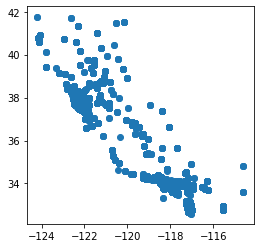

In [6]:
buildings_geo.plot()

--- 

### Facility listing

In [7]:
#https://data.chhs.ca.gov/dataset/healthcare-facility-locations/resource/0a0476ba-442c-40ff-97dc-dc840fa7e907
facilities = pd.read_excel('input/healthcare_facility_locations.xlsx')

In [8]:
facilities.columns = facilities.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [9]:
facilities_geo = gpd.GeoDataFrame(
    facilities, geometry=gpd.points_from_xy(facilities.longitude, facilities.latitude))

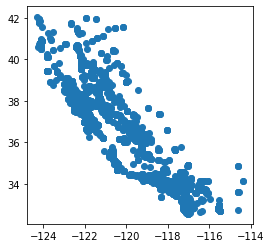

In [10]:
facilities_geo.plot()

In [11]:
hospitals = facilities_geo[facilities_geo['fac_type_code'] == 'GACH']

In [12]:
hospitals['entity_type_description'].value_counts()

NONPROFIT CORP               215
LIMITED LIABILITY COMPANY     65
PROFIT CORP                   49
HEALTH CARE DISTRICT          34
PARTNERSHIP                   19
COUNTY                        17
UC REGENT                      9
OTHER PUBLIC AGENCY            5
STATE AGENCY                   1
INDIVIDUAL                     1
CITY                           1
Name: entity_type_description, dtype: int64

In [13]:
hospitals.head()

facid         npi                                        facname  \
243  30000037  1467560599               METHODIST HOSPITAL OF SACRAMENTO   
261  30000108  1447494323                         SUTTER AMADOR HOSPITAL   
262  30000109  1194774299                   SUTTER AUBURN FAITH HOSPITAL   
263  30000113  1710918545  UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   
264  30000114  1003867565                       BARTON MEMORIAL HOSPITAL   

    fac_type_code                      fac_fdr      ltc  capacity  \
243          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       158   
261          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC        52   
262          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC        64   
263          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       625   
264          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC        63   

                     address              city    zip    zip9  \
243      7500 HOSPITAL DRIVE        SACRAMENTO  95823  5403.0   
261    200 MISSION BOULEVARD           JACKSON  95642  2564.0   
262   11815 EDUCATION STREET            AUBURN  95602  2410.0   
263  2315 STOCKTON BOULEVARD        SACRAMENTO  95817  2201.0   
264        2170 SOUTH AVENUE  SOUTH LAKE TAHOE  96150  7025.0   

                facadmin                     contact_email     contact_fax  \
243     BALTZ, PHYLLIS A    MARI.SHELTON@DIGNITYHEALTH.ORG  (916) 423-6045   
261      DICKSON, THOMAS          SAMMOND@SUTTERHEALTH.ORG  (209) 223-7454   
262   HANNA, MITCHELL  J           ZOBELC@SUTTERHEALTH.ORG  (530) 886-6611   
263     SIMMONS, BRADLEY             LTNAVARRA@UCDAVIS.EDU  (916) 734-3234   
264  PURVANCE, CLINTON D  PUBLICRELATIONS@BARTONHEALTH.ORG  (530) 541-4697   

    contact_phone_number  county_code county_name  district_number  \
243       (916) 423-3000          440  SACRAMENTO                3   
261       (209) 223-7500           20      AMADOR                3   
262       (530) 888-4557          410      PLACER                3   
263       (916) 734-2011          440  SACRAMENTO                3   
264       (530) 541-3420           80   EL DORADO                3   

    district_name isfacmain  license_number  \
243    SACRAMENTO         Y      30000064.0   
261    SACRAMENTO         Y      30000008.0   
262    SACRAMENTO         Y      30000012.0   
263    SACRAMENTO         Y      30000086.0   
264    SACRAMENTO         Y      30000013.0   

                                 business_name initial_license_date  \
243                     DIGNITY COMMUNITY CARE           1980-06-30   
261                    SUTTER VALLEY HOSPITALS           1979-05-01   
262                    SUTTER VALLEY HOSPITALS           1966-06-30   
263  UNIVERSITY OF CALIFORNIA BOARD OF REGENTS           1953-08-26   
264                   BARTON HEALTHCARE SYSTEM           1963-11-21   

    license_effective_date license_expiration_date entity_type_description  \
243             2019-12-31              2020-12-30          NONPROFIT CORP   
261             2019-11-01              2020-10-31          NONPROFIT CORP   
262             2019-07-26              2020-05-30          NONPROFIT CORP   
263             2019-12-06              2020-04-07               UC REGENT   
264             2019-07-11              2020-06-29          NONPROFIT CORP   

      latitude   longitude                 location     oshpd_id streetnum  \
243  38.463530 -121.416061   (-121.416061,38.46353)  106340951.0      7500   
261  38.350190 -120.764621   (-120.764621,38.35019)  106034002.0       200   
262  38.945570 -121.100331   (-121.100331,38.94557)  106310791.0     11815   
263  38.554290 -121.455181   (-121.455181,38.55429)  106341006.0      2315   
264  38.912319 -119.996583  (-119.996583,38.912319)  106090793.0      2170   

             streetname  cclho_code  cclho_name  fips_county_code  \
243      HOSPITAL DRIVE          34  SACRAMENTO              6067   
261   MISSION BOULEVARD           3      AMADOR              6005   


In [14]:
public_list = ['COUNTY','UC REGENT','OTHER PUBLIC AGENCY','CITY','STATE AGENCY']

In [15]:
public = hospitals[hospitals['entity_type_description'].isin(public_list)]

In [16]:
public.to_csv('output/public_hospitals_from_chhs.csv')

In [17]:
public.contact_email.tolist()

['LTNAVARRA@UCDAVIS.EDU',
 'INFO@SJGH.ORG',
 nan,
 'DFINLEY@DHS.LACOUNTY.GOV',
 'LZMARTINEZ@DHS.LACOUNTY.GOV',
 nan,
 'DCASTILLO@DHS.LACOUNTY.GOV',
 'DBOURGET@UCI.EDU',
 'LICENSINGANDCERTIFICATION@NATIVIDAD.COM',
 'PATRYAN@VERITY.ORG',
 'HOSPITAL.ADMIN@HHS.SCCGOV.ORG',
 'CORRIERUDD@VERIFY.ORG',
 'ADOLPHE.EDWARD@ECRMC.ORG',
 'POLSEN@UCSD.EDU',
 nan,
 'RON.EYRAUD@KERNMEDICAL.COM',
 'RISKMANAGEMENT@ALAMEDAHEALTHSYSTEM.ORG',
 nan,
 'ADALY@ACMEDCTR.ORG',
 'JASPREET.BENEPAL@CCHEALTH.ORG',
 nan,
 'CKUNNAPPILLY@SMCGOV.ORG',
 nan,
 nan,
 nan,
 nan,
 'HOGGANE@ARMC.SBCOUNTY.GOV',
 nan,
 nan,
 'JAJACKSON@ACMEDCTR.ORG',
 nan,
 'PWATKINS@MEDNET.UCLA.EDU',
 'MBWILLIS@MEDNET.UCLA.EDU']

In [18]:
len(public)

33

In [19]:
public.head()

facid         npi                                            facname  \
263  30000113  1710918545      UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   
279  30000135  1275605180                       SAN JOAQUIN GENERAL HOSPITAL   
698  50000039  1629167457                      VENTURA COUNTY MEDICAL CENTER   
918  60000027  1295757938                     LAC/HARBOR UCLA MEDICAL CENTER   
919  60000028  1336156363  LAC/RANCHO LOS AMIGOS NATIONAL REHABILITATION ...   

    fac_type_code                      fac_fdr      ltc  capacity  \
263          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       625   
279          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       152   
698          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       180   
918          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       415   
919          GACH  GENERAL ACUTE CARE HOSPITAL  NON-LTC       158   

                     address         city    zip    zip9            facadmin  \
263  2315 STOCKTON BOULEVARD   SACRAMENTO  95817  2201.0    SIMMONS, BRADLEY   
279     500 W. HOSPITAL ROAD  FRENCH CAMP  95231  9693.0    CULBERSON, DAVID   
698         300 HILLMONT AVE      VENTURA  93003  3099.0    FANKHAUSER, JOHN   
918         1000 W CARSON ST     TORRANCE  90502  2004.0  MCKENZIE, KIMBERLY   
919        7601 IMPERIAL HWY       DOWNEY  90242  3456.0       OROZCO, JORGE   

                   contact_email     contact_fax contact_phone_number  \
263        LTNAVARRA@UCDAVIS.EDU  (916) 734-3234       (916) 734-2011   
279                INFO@SJGH.ORG  (209) 468-7011       (209) 468-6000   
698                          NaN  (805) 652-6169       (805) 652-6075   
918     DFINLEY@DHS.LACOUNTY.GOV  (310) 328-9624       (310) 222-2345   
919  LZMARTINEZ@DHS.LACOUNTY.GOV  (562) 803-0056       (562) 385-7022   

     county_code  county_name  district_number district_name isfacmain  \
263          440   SACRAMENTO                3    SACRAMENTO         Y   
279          490  SAN JOAQUIN                3    SACRAMENTO         Y   
698          660      VENTURA                5       VENTURA         Y   
918          200  LOS ANGELES                6        ORANGE         Y   
919          200  LOS ANGELES                6        ORANGE         Y   

     license_number                                     business_name  \
263      30000086.0         UNIVERSITY OF CALIFORNIA BOARD OF REGENTS   
279      30000087.0                             COUNTY OF SAN JOAQUIN   
698      50000032.0                                 COUNTY OF VENTURA   
918      60000129.0  LOS ANGELES COUNTY DEPARTMENT OF HEALTH SERVICES   
919      60000161.0  LOS ANGELES COUNTY DEPARTMENT OF HEALTH SERVICES   

    initial_license_date license_effective_date license_expiration_date  \
263           1953-08-26             2019-12-06              2020-04-07   
279           1953-07-01             2020-01-01              2020-10-31   
698           1953-07-01             2020-03-01              2021-02-28   
918           1953-07-01             2019-05-01              2020-04-30   
919           1953-07-01             2020-01-23              2020-03-30   

    entity_type_description   latitude   longitude                 location  \
263               UC REGENT  38.554290 -121.455181   (-121.455181,38.55429)   
279                  COUNTY  37.886550 -121.282211   (-121.282211,37.88655)   
698                  COUNTY  34.279145 -119.254337  (-119.254337,34.279145)   
918                  COUNTY  33.831540 -118.294551   (-118.294551,33.83154)   
919                  COUNTY  33.929100 -118.158001    (-118.158001,33.9291)   

        oshpd_id streetnum          streetname  cclho_code   cclho_name  \
263  106341006.0      2315  STOCKTON BOULEVARD          34   SACRAMENTO   
279  106391010.0       500    W. HOSPITAL ROAD          39  SAN JOAQUIN   
698  106560481.0       300        HILLMONT AVE          56      VENTURA   
918  106191227.0      1000         W CARSON ST          19  LOS ANGELES   
919  10

---

## CHHS: Hospital Annual Utilization Report

In [20]:
# https://data.chhs.ca.gov/dataset/hospital-annual-utilization-report
# pivot table: https://data.chhs.ca.gov/dataset/hospital-annual-utilization-report/resource/4ee65e8c-ca6e-42d3-9aec-adcc56383856

In [21]:
utilization = pd.read_excel('input/hosp19_util_data_final.xlsx', sheet_name='Page 1-6')

In [22]:
utilization.columns = utilization.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [23]:
utilization.iloc[0]

description                                                                                              NaN
fac_no                                                                                             106010735
fac_name                                                                                    ALAMEDA HOSPITAL
fac_str_addr                                                                                2070 CLINTON AVE
fac_city                                                                                             ALAMEDA
fac_zip                                                                                                94501
fac_phone                                                                                       510-522-3700
fac_admin_name                                                                                  Luis Fonseca
fac_operated_this_yr                                                                                     Yes
fac_op_per_begin_dt

In [24]:
utilization.rename(columns={"ic_cen_days": "icu_days", "ic_lic_bed_days": "icu_bed_days",\
                     'ic_lic_beds':'icu_beds'}, inplace=True)

In [25]:
utilization[['fac_no', 'fac_name', 'fac_city', 'county', 'license_no', 'fac_zip', 'icu_beds', 'tot_lic_beds']].sort_values('tot_lic_beds', ascending=False).to_csv('output/hospital_utilization.csv', index=False)

In [26]:
utilization['icu_occupancy_rate'] = ((utilization.icu_days / utilization.icu_bed_days)*100).round()

In [27]:
utilization_geo = gpd.GeoDataFrame(
    utilization, geometry=gpd.points_from_xy(utilization.longitude, utilization.latitude))

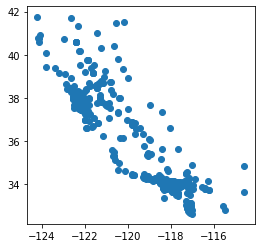

In [28]:
utilization_geo.plot()

In [29]:
utilization_counties = utilization_geo.groupby(['county']).agg({'icu_days':'sum', 'icu_bed_days':'sum', \
                                                  'icu_beds':'sum', 'icu_occupancy_rate':'mean'}).reset_index()

In [30]:
utilization_counties.sort_values(by='icu_beds', ascending=False).head()

county  icu_days  icu_bed_days  icu_beds  icu_occupancy_rate
17     Los Angeles  461347.0        765503      2109           65.174419
28          Orange  131000.0        227237       622           59.206897
35       San Diego  123108.0        216725       580           56.000000
34  San Bernardino  132084.0        181040       496           80.350000
36   San Francisco   68544.0        125184       381           53.166667

In [31]:
utilization_counties.fillna('').to_csv('output/icu_by_county.csv')

In [32]:
icus = utilization_geo[utilization_geo['icu_beds'] > 0]
icus_slim = icus[[ 'fac_name', 'county', 'icu_beds','icu_days', \
                  'icu_bed_days', 'icu_occupancy_rate', 'geometry' ]]

In [33]:
icus_slim.sort_values(by='icu_beds', ascending=False).head()

fac_name       county  icu_beds  \
184                         LAC+USC MEDICAL CENTER  Los Angeles       130   
151                    CEDARS-SINAI MEDICAL CENTER  Los Angeles       126   
171              RONALD REAGAN UCLA MEDICAL CENTER  Los Angeles       120   
295  UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   Sacramento       116   
410                           STANFORD HEALTH CARE  Santa Clara       104   

     icu_days  icu_bed_days  icu_occupancy_rate                     geometry  
184   29135.0         47450                61.0  POINT (-118.21031 34.05982)  
151   32248.0         45990                70.0  POINT (-118.38061 34.07681)  
171   44345.0         43800               101.0  POINT (-118.44500 34.06889)  
295   32532.0         42340                77.0  POINT (-121.45738 38.55438)  
410    2347.0          5720                41.0  POINT (-122.17657 37.43384)

In [34]:
len(icus)

345

In [35]:
icus_slim.to_file('output/icus.geojson', driver='GeoJSON')

In [36]:
icus_slim.sort_values(by='icu_beds', ascending=False).head()

fac_name       county  icu_beds  \
184                         LAC+USC MEDICAL CENTER  Los Angeles       130   
151                    CEDARS-SINAI MEDICAL CENTER  Los Angeles       126   
171              RONALD REAGAN UCLA MEDICAL CENTER  Los Angeles       120   
295  UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   Sacramento       116   
410                           STANFORD HEALTH CARE  Santa Clara       104   

     icu_days  icu_bed_days  icu_occupancy_rate                     geometry  
184   29135.0         47450                61.0  POINT (-118.21031 34.05982)  
151   32248.0         45990                70.0  POINT (-118.38061 34.07681)  
171   44345.0         43800               101.0  POINT (-118.44500 34.06889)  
295   32532.0         42340                77.0  POINT (-121.45738 38.55438)  
410    2347.0          5720                41.0  POINT (-122.17657 37.43384)

In [37]:
icus_slim.to_csv('output/icu_by_facility_nu.csv', index=False)

### ICU bed rate per 100,000 residents

In [38]:
# basically one bed for every 5,350 residents not counting 50% occupancy rate already
(icus_slim.icu_beds.sum()*100000) / 39512223

18.657517700282266

### ICU bed rate per 100,000 residents older than 65 (5.6 million in CA)

In [39]:
# basically one bed for every 37,500 residents over 65 not counting 50% occupancy rate already
(icus_slim.icu_beds.sum()*100000) / (39512223/0.143)

2.6680250311403633

--- 

In [40]:
county_pop = pd.read_csv('input/processed/acs5_2018_population_counties.csv',\
                        dtype={'geoid':'object', 'state':'object', 'county':'object'})

In [41]:
ca_counties = pd.DataFrame(county_pop[county_pop['state'] == '06'])

In [42]:
ca_counties.drop(columns=['universe_annotation', 'universe_moe', 'universe_moe_annotation'], inplace=True)
ca_counties.rename(columns={"universe": "population"}, inplace=True)

In [43]:
ca_counties['county'] = ca_counties['name'].str.replace(' County, California', '')

In [44]:
ca_counties.head()

geoid                          name  population state     county
181  06001    Alameda County, California   1643700.0    06    Alameda
182  06005     Amador County, California     37829.0    06     Amador
183  06007      Butte County, California    227075.0    06      Butte
184  06009  Calaveras County, California     45235.0    06  Calaveras
185  06011     Colusa County, California     21464.0    06     Colusa

In [45]:
icus_county_pop = utilization_counties.merge(ca_counties, on='county')

In [46]:
bayarea = ['Alameda', 'Marin', 'Contra Costa', 'San Mateo', 'Santa Clara', 'San Francisco']

In [47]:
bayarea_counties = icus_county_pop[icus_county_pop['county'].isin(bayarea)]
bayarea_counties.population.sum()

6595421.0

In [48]:
bayarea_counties.head(6)

county  icu_days  icu_bed_days  icu_beds  icu_occupancy_rate  \
0         Alameda   56877.0         94400       256           67.800000   
5    Contra Costa   39346.0         61685       169           65.750000   
19          Marin    7016.0         10950        30           67.333333   
36  San Francisco   68544.0        125184       381           53.166667   
39      San Mateo   18016.0         35040        96           51.000000   
41    Santa Clara   79598.0        116850       366           65.636364   

    geoid                              name  population state  
0   06001        Alameda County, California   1643700.0    06  
5   06013   Contra Costa County, California   1133247.0    06  
19  06041          Marin County, California    260295.0    06  
36  06075  San Francisco County, California    870044.0    06  
39  06081      San Mateo County, California    765935.0    06  
41  06085    Santa Clara County, California   1922200.0    06

In [49]:
icus_county_pop.head()

county  icu_days  icu_bed_days  icu_beds  icu_occupancy_rate  geoid  \
0    Alameda   56877.0         94400       256                67.8  06001   
1     Amador    1291.0          2190         6                59.0  06005   
2      Butte    8593.0         17155        47                52.0  06007   
3  Calaveras     597.0          2920         8                20.0  06009   
4     Colusa      18.0          2190         6                 1.0  06011   

                           name  population state  
0    Alameda County, California   1643700.0    06  
1     Amador County, California     37829.0    06  
2      Butte County, California    227075.0    06  
3  Calaveras County, California     45235.0    06  
4     Colusa County, California     21464.0    06

In [50]:
icus_county_pop['icus_per1000'] = (icus_county_pop['icu_beds'] * 100000) / icus_county_pop['population']

In [51]:
icus_county_pop.sort_values(by='icus_per1000', ascending=False).head()

county  icu_days  icu_bed_days  icu_beds  icu_occupancy_rate  \
36  San Francisco   68544.0        125184       381           53.166667   
43         Shasta   11857.0         25613        70           47.000000   
26           Napa    5576.0         17520        48           41.000000   
18         Madera   10684.0         18980        52           62.000000   
55           Yuba    6380.0          8760        24           73.000000   

    geoid                              name  population state  icus_per1000  
36  06075  San Francisco County, California    870044.0    06     43.790889  
43  06089         Shasta County, California    179085.0    06     39.087584  
26  06055           Napa County, California    140530.0    06     34.156408  
18  06039         Madera County, California    155013.0    06     33.545574  
55  06115           Yuba County, California     75493.0    06     31.791027

In [52]:
icus_county_pop_slim = icus_county_pop[[ 'county', 'icu_beds', 'icus_per1000']]

In [53]:
icus_county_pop_slim.to_csv('output/icus_county_pop_slim.csv')

---

In [54]:
counties_geo = gpd.read_file('/Users/mhustiles/data/data/GIS/LA/counties/2012/counties.shp')

In [55]:
counties_geo.rename(columns={"fips": "geoid"}, inplace=True)

In [56]:
counties_geo = counties_geo.to_crs({'init': 'epsg:4326'})

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [57]:
counties_geo.columns = counties_geo.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [58]:
counties_geo.head()

statefips countyfips   fips           name  \
0        06        059  06059         Orange   
1        06        103  06103         Tehama   
2        06        011  06011         Colusa   
3        06        083  06083  Santa Barbara   
4        06        051  06051           Mono   

                                            geometry  
0  MULTIPOLYGON (((-118.09740 33.77419, -118.0974...  
1  POLYGON ((-122.19917 40.37794, -122.19913 40.3...  
2  POLYGON ((-122.25698 39.38484, -122.25688 39.3...  
3  MULTIPOLYGON (((-120.51392 34.98928, -120.5120...  
4  POLYGON ((-119.30890 38.00715, -119.30886 38.0...

In [59]:
counties_geo_slim = counties_geo[[ 'fips', 'name', 'geometry']]

In [60]:
icus_geo = counties_geo_slim.merge(icus_county_pop, left_on='fips', right_on='geoid')

In [61]:
icus_geo.to_file('output/icus_geo.geojson', driver='GeoJSON')

In [62]:
# !tippecanoe --generate-ids --force -r1 -pk -pf -o \
# output/icus_geo.mbtiles \
# output/icus_geo.geojson